In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("student_data.csv")
df.head() # Displays the first 5 rows (instances - samples) and all columns (features)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info() # Prints dataset structure: columns, non-null counts (missing values), and data types

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    str  
 1   sex         395 non-null    str  
 2   age         395 non-null    int64
 3   address     395 non-null    str  
 4   famsize     395 non-null    str  
 5   Pstatus     395 non-null    str  
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    str  
 9   Fjob        395 non-null    str  
 10  reason      395 non-null    str  
 11  guardian    395 non-null    str  
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    str  
 16  famsup      395 non-null    str  
 17  paid        395 non-null    str  
 18  activities  395 non-null    str  
 19  nursery     395 non-null    str  
 20  higher      395 non-null    str  
 21  inte

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "string"]).columns.tolist()

print("Number of numerical features:", len(numerical_features))
print("Numerical features:", numerical_features)

print("\nNumber of categorical features:", len(categorical_features))
print("Categorical features:", categorical_features)

Number of numerical features: 16
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Number of categorical features: 17
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [6]:
print("Descriptive statistics for numerical features:")
df[numerical_features].describe().T

Descriptive statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [7]:
print("Target variable (G3) summary statistics:")
print(df["G3"].describe())

Target variable (G3) summary statistics:
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


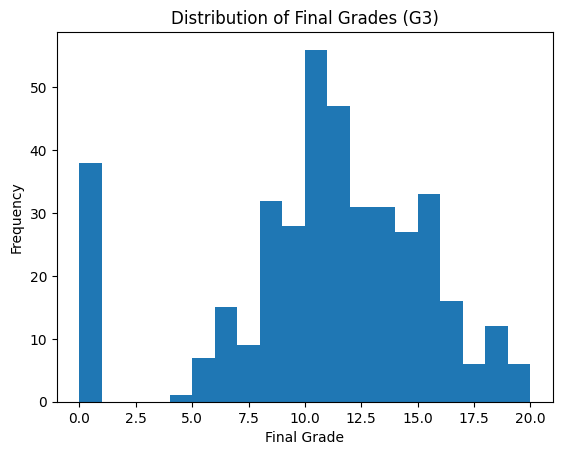

In [34]:
plt.figure() # Create a new figure (canvas for the plot)
plt.hist(df["G3"], bins=20) 
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show() 

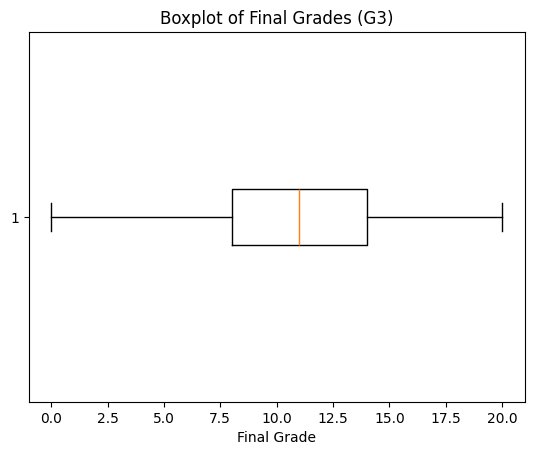

In [9]:
plt.figure()
plt.boxplot(df["G3"], vert=False) # Create a horizontal boxplot for the final grades (G3)
plt.title("Boxplot of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.show()

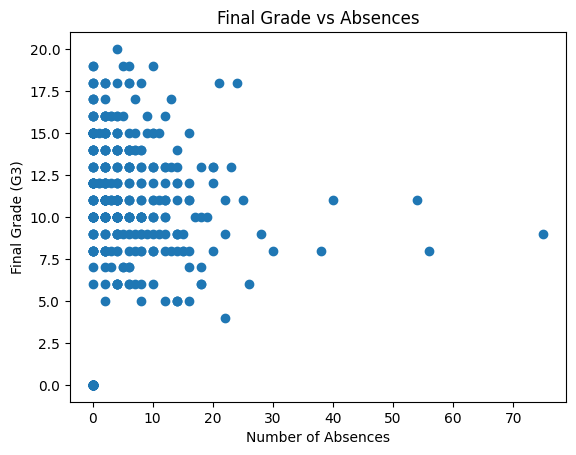

In [10]:
plt.figure()
plt.scatter(df["absences"], df["G3"]) # Create a scatter plot showing the relationship between the number of absences and the final grade (G3)
plt.title("Final Grade vs Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

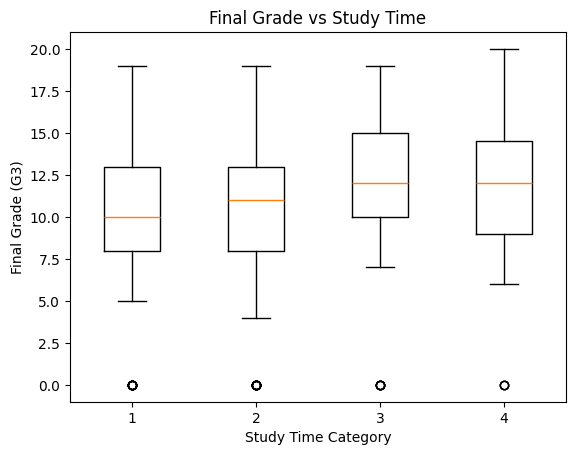

In [11]:
study_time_categories = df["studytime"].sort_values().unique() # Extract and sort unique study time categories

g3_by_study_time = []

# Collect final grades for each study time category
for category in study_time_categories:
    grades = df.loc[df["studytime"] == category, "G3"]
    g3_by_study_time.append(grades)

plt.boxplot(
    g3_by_study_time,
    tick_labels=study_time_categories
)

plt.title("Final Grade vs Study Time")
plt.xlabel("Study Time Category")
plt.ylabel("Final Grade (G3)")
plt.show()

<Figure size 640x480 with 0 Axes>

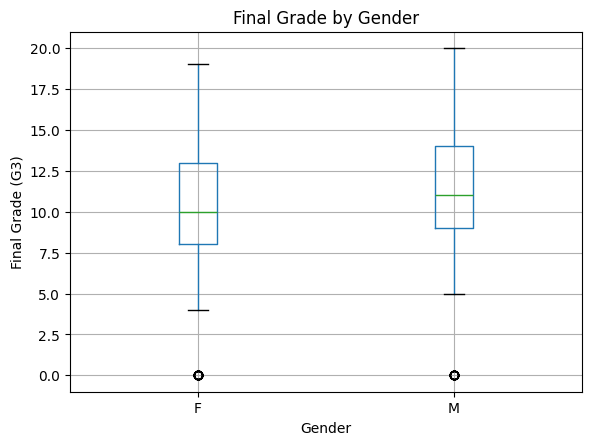

In [12]:
plt.figure()
df.boxplot(column="G3", by="sex") # Create a boxplot of final grades (G3) grouped by gender
plt.title("Final Grade by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Final Grade (G3)")
plt.show()

In [13]:
correlation_matrix = df[numerical_features].corr()

print("Correlation matrix (numerical features):")
correlation_matrix

Correlation matrix (numerical features):


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [14]:
print("Correlation of numerical features with G3:")
correlation_matrix["G3"].sort_values(ascending=False)

Correlation of numerical features with G3:


G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [15]:
print("Number of unique values per categorical feature:")
df[categorical_features].nunique().sort_values(ascending=False)

Number of unique values per categorical feature:


Fjob          5
Mjob          5
reason        4
guardian      3
school        2
Pstatus       2
famsize       2
address       2
sex           2
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [16]:
# Problem Setup - By convention, X is used to represent the feature matrix, while y denotes the target vector.

y = df["G3"] # target variable / label -> (number_of_samples (training instances),) 

X = df.drop(columns=["G3"]) # input features / predictors -> (number_of_samples (training instances), number_of_features (attributes))

In [17]:
# Train / Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape) # number of training samples with the number of input features each
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) # contains the target values for each sample
print("y_test shape:", y_test.shape)

X_train shape: (316, 32)
X_test shape: (79, 32)
y_train shape: (316,)
y_test shape: (79,)


In [18]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "string"]).columns

print("Numerical features:", list(numerical_features))
print("Categorical features:", list(categorical_features))

Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [19]:
# This block prepares the data by scaling numerical features and one-hot encoding categorical features using a ColumnTransformer

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    drop="first"
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [20]:
# Model Definition and Pipeline Setup

model = LinearRegression()

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

print("Pipeline created: preprocessing + Linear Regression model")

Pipeline created: preprocessing + Linear Regression model


In [21]:
# Train the pipeline (preprocessing + model) on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate regression performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1.6466656197147496
RMSE: 2.3783697847961363
R2: 0.7241341236974023


In [22]:
# Get feature names after preprocessing
feature_names_num = numerical_features
feature_names_cat = (
    pipeline.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)

all_feature_names = np.concatenate([feature_names_num, feature_names_cat])

# Get coefficients from the linear regression model
coefficients = pipeline.named_steps["model"].coef_

# Create a DataFrame
coef_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": coefficients
})

# Sort by absolute value of coefficients
coef_df["abs_coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

coef_df.head(10)

,Feature,Coefficient,abs_coef
14,G2,3.591629,3.591629
33,schoolsup_yes,0.785652,0.785652
13,G1,0.679919,0.679919
28,reason_home,-0.611901,0.611901
36,activities_yes,-0.517500,0.517500
24,Fjob_health,0.481242,0.481242
12,absences,0.467462,0.467462
20,Mjob_health,-0.463244,0.463244
40,romantic_yes,-0.390353,0.390353
38,higher_yes,0.375377,0.375377


In [23]:
# Show top features with the strongest positive and negative impact

top_positive = coef_df.sort_values("Coefficient", ascending=False).head(10)
top_negative = coef_df.sort_values("Coefficient", ascending=True).head(10)

print("Top positive coefficients (increase predicted G3):")
display(top_positive[["Feature", "Coefficient"]])

print("\nTop negative coefficients (decrease predicted G3):")
display(top_negative[["Feature", "Coefficient"]])

Top positive coefficients (increase predicted G3):


,Feature,Coefficient
14,G2,3.591629
33,schoolsup_yes,0.785652
13,G1,0.679919
24,Fjob_health,0.481242
12,absences,0.467462
38,higher_yes,0.375377
16,sex_M,0.374410
29,reason_other,0.304973
6,famrel,0.278446
8,goout,0.212207



Top negative coefficients (decrease predicted G3):


,Feature,Coefficient
28,reason_home,-0.611901
36,activities_yes,-0.517500
20,Mjob_health,-0.463244
40,romantic_yes,-0.390353
26,Fjob_services,-0.294762
21,Mjob_other,-0.237195
37,nursery_yes,-0.236861
30,reason_reputation,-0.221694
5,failures,-0.209884
2,Fedu,-0.180227


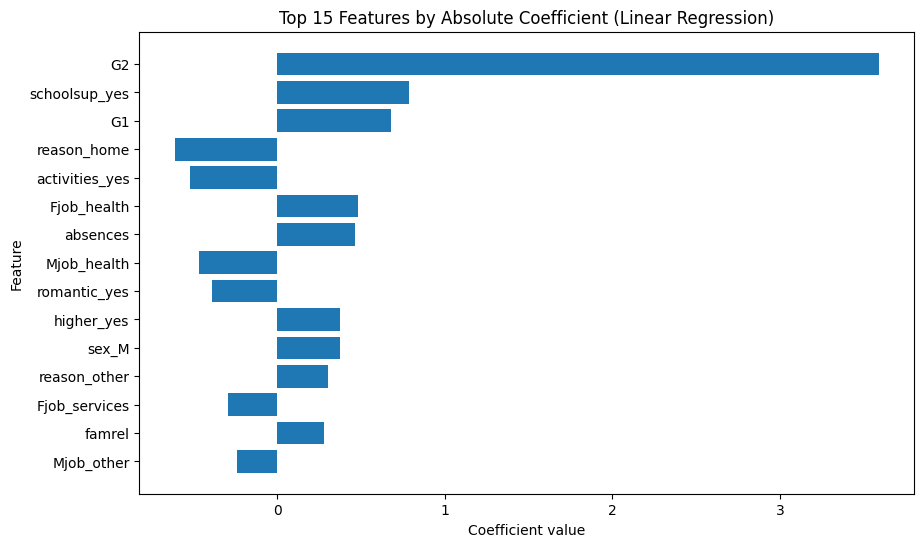

In [24]:
top_abs = coef_df.head(15).sort_values("abs_coef", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_abs["Feature"], top_abs["Coefficient"])
plt.title("Top 15 Features by Absolute Coefficient (Linear Regression)")
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.show()

In [25]:
# Define Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Create pipeline (preprocessing + Random Forest)
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_model)
])

# Train on training data
rf_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate regression performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

print("\nLinear Regression Results (baseline)")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

# Comparison between Random Forest and Linear Regression - (Random Forest metric - Linear Regression metric)
print("\nComparison (RF - LR)")
print("MAE difference:", mae_rf - mae)
print("RMSE difference:", rmse_rf - rmse)
print("R2 difference:", r2_rf - r2)

Random Forest Results
MAE: 1.1832911392405066
RMSE: 1.9816768957800956
R2: 0.8084840640487329

Linear Regression Results (baseline)
MAE: 1.6466656197147496
RMSE: 2.3783697847961363
R2: 0.7241341236974023

Comparison (RF - LR)
MAE difference: -0.463374480474243
RMSE difference: -0.3966928890160406
R2 difference: 0.08434994035133059


In [26]:
# Get feature names after preprocessing
feature_names_num = numerical_features

feature_names_cat = (
    rf_pipeline.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)

all_feature_names = np.concatenate([feature_names_num, feature_names_cat])

# Get feature importances from Random Forest
importances = rf_pipeline.named_steps["model"].feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
14,G2,0.784609
12,absences,0.115567
28,reason_home,0.019727
0,age,0.010030
13,G1,0.006502
33,schoolsup_yes,0.005618
6,famrel,0.005571
11,health,0.004819
8,goout,0.003965
31,guardian_mother,0.003952


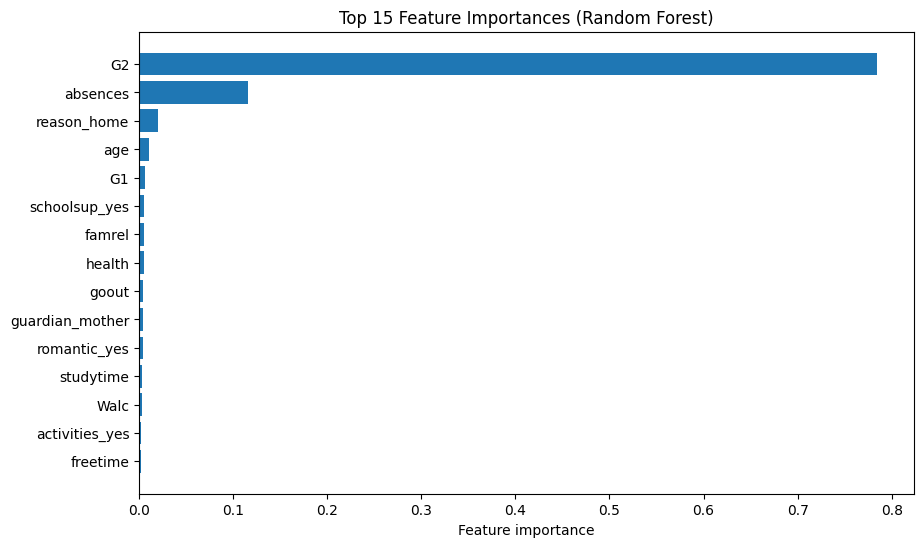

In [27]:
top_features = importance_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [28]:
# Residuals (errors)
residuals = y_test - y_pred_rf

# Absolute errors
abs_errors = np.abs(residuals)

error_df = pd.DataFrame({
    "Actual_G3": y_test,
    "Predicted_G3": y_pred_rf,
    "Residual": residuals,
    "Absolute_Error": abs_errors
})

error_df.head()

,Actual_G3,Predicted_G3,Residual,Absolute_Error
78,10,8.270000,1.730000,1.730000
371,12,11.790000,0.210000,0.210000
248,5,6.743333,-1.743333,1.743333
55,10,9.596667,0.403333,0.403333
390,9,8.923333,0.076667,0.076667


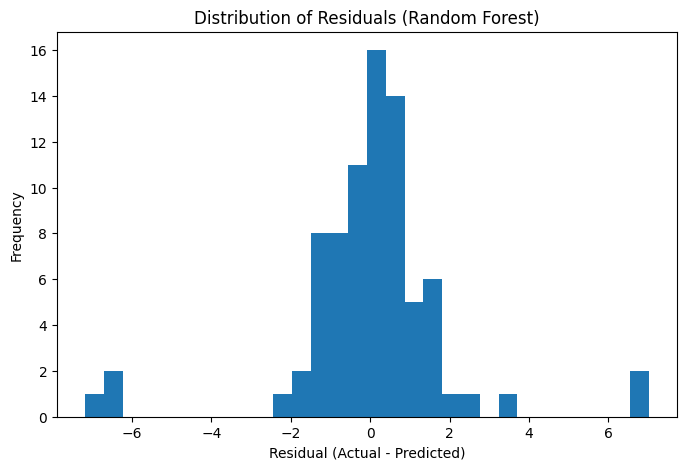

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Random Forest)")
plt.show()

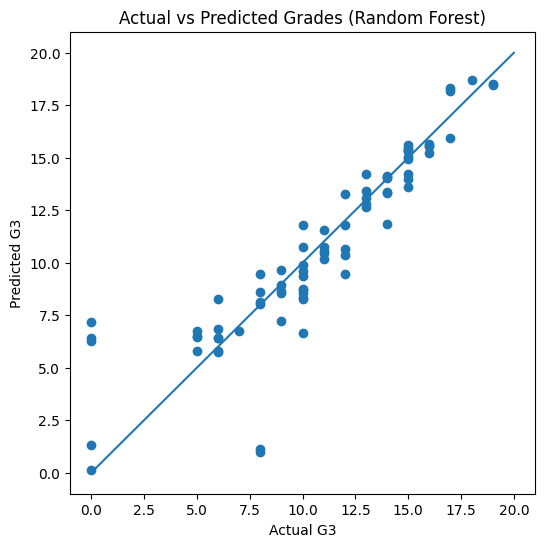

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([0, 20], [0, 20])
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Grades (Random Forest)")
plt.show()

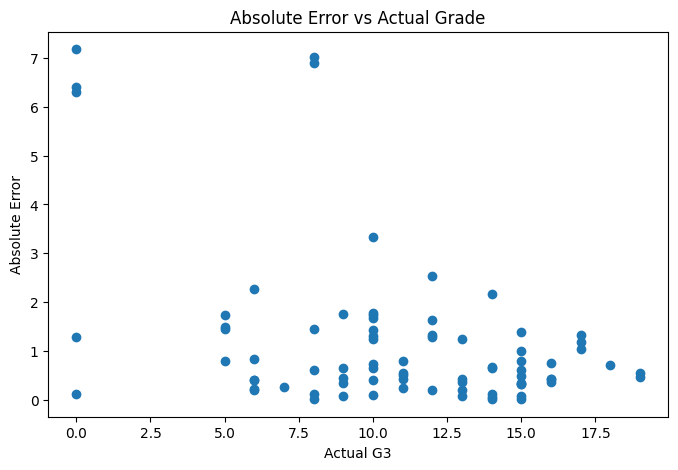

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, abs_errors)
plt.xlabel("Actual G3")
plt.ylabel("Absolute Error")
plt.title("Absolute Error vs Actual Grade")
plt.show()

In [32]:
# 5-fold cross-validation using negative MAE
cv_mae_scores = cross_val_score(
    rf_pipeline,
    X,
    y,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Convert to positive MAE values
cv_mae_scores = -cv_mae_scores

print("Cross-validation MAE scores:", cv_mae_scores)
print("Mean CV MAE:", cv_mae_scores.mean())
print("Std CV MAE:", cv_mae_scores.std())

Cross-validation MAE scores: [1.03649789 1.33725738 0.98240506 0.95092827 1.18755274]
Mean CV MAE: 1.0989282700421938
Std CV MAE: 0.1442458136028201
